<a href="https://colab.research.google.com/github/AlienX77-cmd/Machine-Learning-Practice-Project/blob/main/ML_Classification_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # for building a classification tree
from sklearn.tree import plot_tree # for drawing a classification tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix # for drawing a confusion matrix

In [2]:
# Loading dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None)

In [3]:
# Showing first 5 rows in dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.columns = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']

In [5]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# Checking for missing values
df.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [7]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [8]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [9]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

### '?' is the missing value here

##**Dealing with Missing Values**

In [10]:
# Showing the number of rows with missing values
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [11]:
# Showing the rows with missing values
(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [12]:
len(df)
# Only 6 rows out of 303 rows (2%) have missing value, so using the removing the rows method instead of imputing the value into the missing value in the data

303

In [13]:
df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [14]:
len(df_no_missing) # No more missing values in the dataset

297

In [18]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [19]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

## **Splitting Data**

In [20]:
# Let X = features, Y = target
X = df_no_missing.drop('hd', axis=1) #axis = 1 for dropping column
Y = df_no_missing['hd']

# Note that, dealing the with missing values should be done before splitting data into X and Y, otherwise, the corresponding value of X might not be correctly with the value of Y (if removing rows after splitting data)

In [21]:
print(X)

      age  sex   cp  restbp   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0   145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0   160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0   120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0   130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0   130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...     ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0   140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0   110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0   144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0   130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0   130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca thal  
0      3.0  0.0  6.0  
1      2.0  3.0  3.0  
2     

In [22]:
print(Y)

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: hd, Length: 297, dtype: int64


In [23]:
Y.unique()

array([0, 2, 1, 3, 4])

##**One Hot Encoding**

In [24]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])

In [25]:
print(X_encoded)

      age  sex  restbp   chol  fbs  thalach  exang  oldpeak   ca  cp_1.0  ...  \
0    63.0  1.0   145.0  233.0  1.0    150.0    0.0      2.3  0.0       1  ...   
1    67.0  1.0   160.0  286.0  0.0    108.0    1.0      1.5  3.0       0  ...   
2    67.0  1.0   120.0  229.0  0.0    129.0    1.0      2.6  2.0       0  ...   
3    37.0  1.0   130.0  250.0  0.0    187.0    0.0      3.5  0.0       0  ...   
4    41.0  0.0   130.0  204.0  0.0    172.0    0.0      1.4  0.0       0  ...   
..    ...  ...     ...    ...  ...      ...    ...      ...  ...     ...  ...   
297  57.0  0.0   140.0  241.0  0.0    123.0    1.0      0.2  0.0       0  ...   
298  45.0  1.0   110.0  264.0  0.0    132.0    0.0      1.2  0.0       1  ...   
299  68.0  1.0   144.0  193.0  1.0    141.0    0.0      3.4  2.0       0  ...   
300  57.0  1.0   130.0  131.0  0.0    115.0    1.0      1.2  1.0       0  ...   
301  57.0  0.0   130.0  236.0  0.0    174.0    0.0      0.0  1.0       0  ...   

     cp_4.0  restecg_0.0  r

In [26]:
Y.unique()

array([0, 2, 1, 3, 4])

In [28]:
Y_not_zero_index = Y > 0 # Getting the index for each non-zero value in y
Y[Y_not_zero_index] = 1 # Set each non-zero value in y to 1
Y.unique() # Showing that y only contains 0 and 1

<ipython-input-28-3782932d5c27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y_not_zero_index] = 1 # Set each non-zero value in y to 1
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array([0, 1])

##**Build Preliminary Classification Tree**

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded,  Y, random_state=42)

# Create a Decision tree and fit it to the  training data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, Y_train)

[Text(0.5732758620689655, 0.9583333333333334, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.33189655172413796, 0.875, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.2025862068965517, 0.7916666666666666, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(0.14655172413793102, 0.7083333333333334, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.08620689655172414, 0.625, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No HD'),
 Text(0.05172413793103448, 0.5416666666666666, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(0.034482758620689655, 0.4583333333333333, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(0.017241379310344827, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No HD'),
 Text(0.05172413793103448, 0.375, 'exang <= 0.5\ngini = 0.

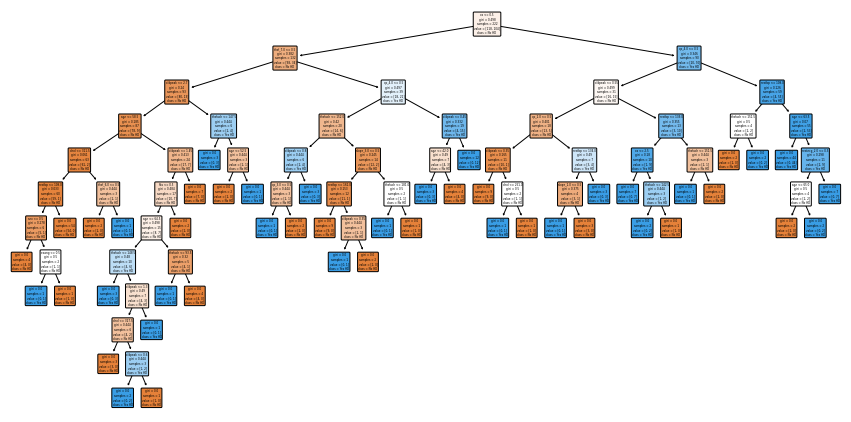

In [32]:
# Plotting the tree (HD = Heart Disease)
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, filled=True, rounded=True, class_names=["No HD", "Yes HD"], feature_names = X_encoded.columns)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


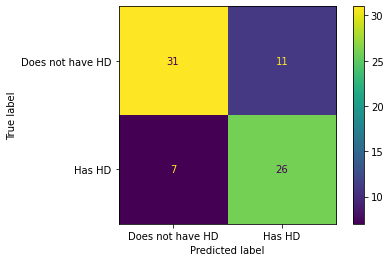

In [34]:
# plot_confusion_matrix() will run the test data down the tree and draw
# Confusion matrix
plot_confusion_matrix(clf_dt, X_test, Y_test, display_labels=["Does not have HD", "Has HD"])

In the confusion matrix, we see that of the **31 + 11 = 42 people that did not have Heart Disease (HD),** **31 (74%) were correctly classified** and of the **7 + 26 = 33 people that have Heart Disease (HD), 26 (79%) were correctly classified.**

One thing that might be holding this Classification Tree back is that it may have **overfit** the training dataset. Hence, let's prune the tree. Pruning, in theory, should solve the overfitting problem and give the better result than this.

##**Cost Complexity Pruning Part 1: Visualize Alpha**

**Decision Trees** are notorious for being **overfit** to the Training Dataset, and there are a lot of parameters, like *max_depth* and *min_samples*, that are designed to reduce overfitting. However, pruning a tree with **cost complexity pruning** can simplify the whole process of finding a smaller tree that improves the accuracy with the **Testing Dataset**.

**Pruning** a decision tree is all about finding the right value for the pruning parameter, *alpha*, which controls how little or how much pruning happens. One way to find the optimal value for *alpha* is to plot the accuracy of the tree as a function of different values. We'll do this for both the **Training Dataset** and **Testing Dataset**.

First, let's extract the different values of alpha that are available for this tree and build a pruned tree for each value for alpha. 

**NOTE:** We omit the maximum value for alpha with ccp_alphas = ccp_alphas[:-1] because it would prune all leaves, leaving us with only a root instead of a tree.

In [37]:
path = clf_dt.cost_complexity_pruning_path(X_train, Y_train) # Determine the values for alpha
ccp_alphas = path.ccp_alphas # Extract different values for alpha
print(ccp_alphas)
ccp_alphas = ccp_alphas[:-1] # Exclude the maximum value for alpha
print(ccp_alphas)

[0.         0.00295295 0.003861   0.00405405 0.004095   0.00429358
 0.00514801 0.00541298 0.00578761 0.00600601 0.00600601 0.00600601
 0.00667591 0.00675676 0.00757375 0.00811505 0.00868726 0.00889851
 0.01038181 0.0105777  0.01422475 0.01604051 0.01642461 0.02103075
 0.03680006 0.03934523 0.13046216]
[0.         0.00295295 0.003861   0.00405405 0.004095   0.00429358
 0.00514801 0.00541298 0.00578761 0.00600601 0.00600601 0.00600601
 0.00667591 0.00675676 0.00757375 0.00811505 0.00868726 0.00889851
 0.01038181 0.0105777  0.01422475 0.01604051 0.01642461 0.02103075
 0.03680006 0.03934523]


In [39]:
# Create one decision tree per value for alpha and store it in the array
clf_dts = []

for ccp_alpha in ccp_alphas:
	clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
	clf_dt.fit(X_train, Y_train)
	clf_dts.append(clf_dt)

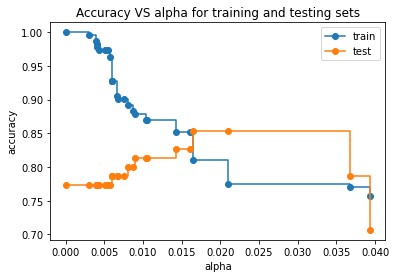

In [40]:
# Now let's graph the accuracy of the trees using the Training Dataset and the Testing Dataset as a function of alpha

train_scores = [clf_dt.score(X_train, Y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, Y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy VS alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In the graph above, we see that the accuracy for the **Testing Dataset** hits its **maximum value** when *alpha* is about 0.016. After this value for *alpha*, the accuracy of the **Training Dataset** drops off and that suggests we should set ***ccp_alpha = 0.016***.

**NOTE:** When we apply **Cost Complexity Pruning** to a Classification tree, values for *alpha* go from 0 to 1, because **GINI scores** go from 0 to 1. In contrast, values for *alpha* for a Regression Tree can be much larger since the **sum of squared residuals** can, in theory, go from 0 to positive infinity.

(residual = the difference between the actual value and the mean value of the whole dataset)

Since there are many ways we could have divided the original dataset into **Training and Testing datasets**, how do we know we used the best **Training Dataset** and how do we know we used the best **Testing Dataset**? Typically, we answer this question with **10-Fold Cross Validation**. So that's what we're going to do next, and we'll do it with the *cross_val_score()* function

##**Cost Complexity Pruning Part 2: Cross Validation for Finding the Best Alpha**

The graph we just drew suggested one value for *alpha*, 0.016, but another set of data might suggest another **optimal value**.

First, let's demonstrate that different training and testing datasets result in trees with different accuracies when we set ccp_alpha = 0.016. We will do this by using the *cross_val_score()* function to generate different training and testing datasets and then train and test the tree with those datasets


In [41]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016) # Creating the tree with ccp_alpha = 0.016

# now use 5-fold cross validation to create 5 different training and testing datasets that are then used to train and test the tree
# NOTE: We use 5-fold because we don't have tons of data

scores = cross_val_score(clf_dt, X_train, Y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores}) #range(5) = 0,1,2,3,4 ==> because we have only 5-fold (K = 5) for K-fold CV
df.head()

,tree,accuracy
0,0,0.533333
1,1,0.866667
2,2,0.750000
3,3,0.750000
4,4,0.772727


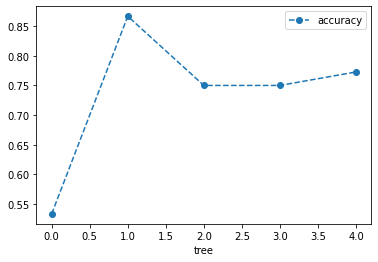

In [42]:
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

The graph above shows that using different **Training** and **Testing** data with the same *alpha* resulted in different accuracies, suggesting that *alpha* is sensitive to the datasets. So, instead of picking a **single Training dataset** and **single Testing Dataset**, let's use **cross validation** to find ***the optimal value for ccp_alpha***

In [43]:
# Creating an array to store the results of each fold during Cross Validation
alpha_loop_values = []

# For each candidate value for alpha, we will run 5-fold cross validation, then we will store the mean and standard deviation of the scores (the acccuracy) for each call to cross_val_score in alpha_loop values 
for ccp_alpha in ccp_alphas:
	clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
	scores = cross_val_score(clf_dt, X_train, Y_train, cv=5)
	alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

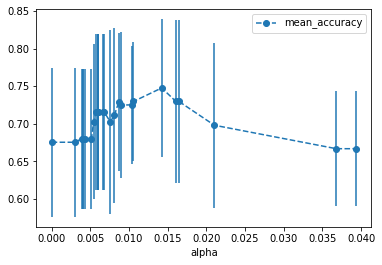

In [44]:
# Now we can draw a graph of the means and standard deviations of the scores for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')

Using **cross validation**, we can see that, over all, instead of setting ccp_alpha=0.016, we need to set it to something closer to 0.014. We can find the exact value with:

In [45]:
alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [57]:
# Now let's store the ideal value for alpha so that we can use it to build the best tree.

ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]

ideal_ccp_alpha


,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [58]:
ideal_ccp_alpha_ = alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]['alpha'] # Choosing alpha column only

ideal_ccp_alpha_

20    0.014225
Name: alpha, dtype: float64

In [59]:
# NOTE: At this point Python thinks that ideal_ccp_alpha is a series, which is a type of array. We can tell because when we printed ideal_ccp_alpha out, we got two bits of stuff. The first one was 20, which is the index in the series, the second one, 0.014225, is the value we want. So, we can convert this from a series to a float with the following command:

# Convert ideal_ccp_alpha from a series to a flot
ideal_ccp_alpha_ = float(ideal_ccp_alpha_)
ideal_ccp_alpha_

0.014224751066856332

Now we have the ideal value for alpha and we can build and evaluate and draw the final **Classification Tree**.

##**Building, Evaluating, Drawing, and Interpreting the Final Classification Tree**

In [61]:
#Now that we have the ideal value for alpha, we can build the final Classification Tree by setting ccp_alpha=ideal_ccp_alpha_:

# Building and training a new decision tree, only this time => use the optimal value for alpha
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha_)
clf_dt_pruned = clf_dt_pruned.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


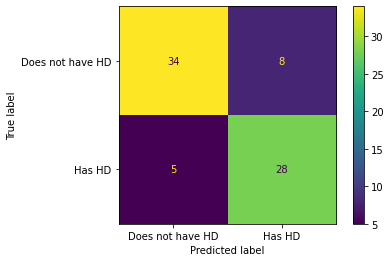

In [63]:
# Drawing a confusion matrix to see if the pruned tree does better
plot_confusion_matrix(clf_dt_pruned, X_test, Y_test, display_labels=['Does not have HD', 'Has HD'])

We can see that **pruned tree is better at classifying patients than the full sized tree**.

of the **34 + 8 = 42 people** that did not have heart disease, **34 (81 %) were correctly classified**. This is **an improvement over the full sized tree**, which only correctly classified 31 (74%) of the patients without heart disease. Of the **5 + 28 = 33 people** with heart disease, **28 (85%) were correctly classified**. Again, this is **an improvement over the full sized tree**, which only correctly classified 26 (79%) of the patients with heart disease.



[Text(0.5769230769230769, 0.875, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.3076923076923077, 0.625, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.15384615384615385, 0.375, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(0.07692307692307693, 0.125, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.23076923076923078, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Yes HD'),
 Text(0.46153846153846156, 0.375, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Yes HD'),
 Text(0.38461538461538464, 0.125, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No HD'),
 Text(0.5384615384615384, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Yes HD'),
 Text(0.8461538461538461, 0.625, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes HD'),
 Text(0.7692307692307693, 0.375, 'oldpeak <= 0.5

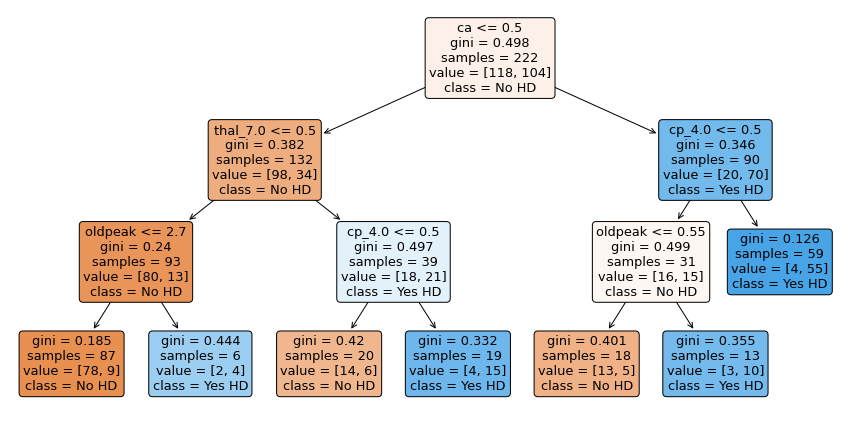

In [64]:
#The last thing we're going to do is to draw the pruned tree and discuss how to interpret it.

plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned, filled=True, rounded=True, class_names=['No HD', 'Yes HD'], feature_names=X_encoded.columns)

Now let's discuss how to interpret the tree. 

In each node, we have:

- **The variable** (column name) and the threshold for splitting the observations. For example, in the tree's root, we use **ca** to split the observations. All observations with **ca <= 0.5** go to the **left** and all observations with **ca > 0.5** go to the **right**
- **gini** is the gini index or score for that node
- **samples** tell us how many samples are in that node
- **value** tells us how many samples in the node are in each category. In this example, we have **two categories, No and Yes**, referring to whether or not a patient has heart disease. The number of patinets with **No** *comes first because the categories are in alphabetical order*. Thus, in the root, **118 patients have No and 104 patients have Yes**.
- **class** tells us whichever category is represented most in the node. In the root, since **118 people have No** and only **104 people have Yes**, **class is set to** **No**.

The **leaves** are just like the nodes, except that they do not contain a variable and threshold for splitting the observations.

Lastly, the nodes and leaves are colored by the class. In this case **No** is **different shades of orange-ish** and **Yes** is **different shades of blue**. **The darker the shade, the lower the gini score**, and that tells us how much the node or leaf is skewed towards one class.

##**In conclusion,**

- Imported Data
- Indentified and Dealt with Missing Data
- Formatted the Data for Decision Trees using One-Hot Encoding (as sklearn decision tree only supports numerical values)
- Built a Preliminary Decision Tree for Classification
- Pruned the Decision Tree with Cost Complexity Pruning
- Built, Drew, Interpreted and Evaluated the Final Decision Tree